# **Credit Card Transactions Fraud Detection**

------------------

# downloading Dataset

In [1]:
!pip install --upgrade opendatasets --quiet

In [2]:
import opendatasets as od

In [3]:
source_url="https://www.kaggle.com/datasets/kartik2112/fraud-detection"

In [4]:
od.download(source_url)

Skipping, found downloaded files in ".\fraud-detection" (use force=True to force download)


In [5]:
import os

In [6]:
os.listdir()

['.ipynb_checkpoints',
 'bank-customer-churn-prediction',
 'DATA SCIENCE (3).pdf',
 'fraud-detection',
 'Machine learning.pdf',
 'naive-bayes-svm-spam-filtering.ipynb',
 'sms-spam-collection-dataset',
 'T2_credit card fraud.ipynb',
 'T3_bank_churn.ipynb',
 'T4_spam_sms_detection.ipynb']

In [7]:
os.listdir('fraud-detection')

['fraudTest.csv', 'fraudTrain.csv']

# Reading Data

In [8]:
os.listdir('fraud-detection')

['fraudTest.csv', 'fraudTrain.csv']

In [9]:
!pip install --upgrade numpy pandas --quiet

In [10]:
import numpy as np
import pandas as pd

In [11]:
train_raw=pd.read_csv('fraud-detection/fraudTrain.csv')
test_raw=pd.read_csv('fraud-detection/fraudTest.csv')

In [12]:
train_raw

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [13]:
test_raw

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


# Data cleaning and preprocessing

In [14]:
train_raw.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [15]:
test_raw.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [16]:
train_raw.drop(columns=['Unnamed: 0'],inplace=True)
test_raw.drop(columns=['Unnamed: 0'],inplace=True)              

In [17]:
train_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [18]:
train_raw["trans_date_trans_time"] = pd.to_datetime(train_raw["trans_date_trans_time"])
train_raw["dob"] = pd.to_datetime(train_raw["dob"])

test_raw["trans_date_trans_time"] = pd.to_datetime(test_raw["trans_date_trans_time"])
test_raw["dob"] = pd.to_datetime(test_raw["dob"])

In [19]:
train_raw.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [20]:
test_raw.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [21]:
train_raw.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1296675,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,2019-10-03 12:47:28.070214144,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1973-10-03 19:02:55.017178512,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
min,2019-01-01 00:00:18,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1924-10-30 00:00:00,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,2019-06-03 19:12:22.500000,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1962-08-13 00:00:00,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,2019-10-03 07:35:47,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1975-11-30 00:00:00,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,2020-01-28 15:02:55.500000,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1987-02-22 00:00:00,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,2020-06-21 12:13:37,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,2005-01-29 00:00:00,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00
std,NaN,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,NaN,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02


In [22]:
test_raw.describe()

,trans_date_trans_time,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,555719,5.557190e+05,555719.000000,555719.000000,555719.000000,555719.000000,5.557190e+05,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
mean,2020-10-02 01:54:25.166780672,4.178387e+17,69.392810,48842.628015,38.543253,-90.231325,8.822189e+04,1973-11-11 16:30:05.937173264,1.380679e+09,38.542798,-90.231380,0.003860
min,2020-06-21 12:14:25,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924-10-30 00:00:00,1.371817e+09,19.027422,-166.671575,0.000000
25%,2020-08-09 06:10:27.500000,1.800429e+14,9.630000,26292.000000,34.668900,-96.798000,7.410000e+02,1962-09-27 00:00:00,1.376029e+09,34.755302,-96.905129,0.000000
50%,2020-10-03 00:59:48,3.521417e+15,47.290000,48174.000000,39.371600,-87.476900,2.408000e+03,1975-11-30 00:00:00,1.380762e+09,39.376593,-87.445204,0.000000
75%,2020-12-01 03:03:04,4.635331e+15,83.010000,72011.000000,41.894800,-80.175200,1.968500e+04,1987-04-23 00:00:00,1.385867e+09,41.954163,-80.264637,0.000000
max,2020-12-31 23:59:34,4.992346e+18,22768.110000,99921.000000,65.689900,-67.950300,2.906700e+06,2005-01-29 00:00:00,1.388534e+09,66.679297,-66.952026,1.000000
std,NaN,1.309837e+18,156.745941,26855.283328,5.061336,13.721780,3.003909e+05,NaN,5.201104e+06,5.095829,13.733071,0.062008


In [23]:
train_raw.count()

trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

In [24]:
train_raw.drop_duplicates(inplace=True)
test_raw.drop_duplicates(inplace=True)

In [25]:
train_raw.count()

trans_date_trans_time    1296675
cc_num                   1296675
merchant                 1296675
category                 1296675
amt                      1296675
first                    1296675
last                     1296675
gender                   1296675
street                   1296675
city                     1296675
state                    1296675
zip                      1296675
lat                      1296675
long                     1296675
city_pop                 1296675
job                      1296675
dob                      1296675
trans_num                1296675
unix_time                1296675
merch_lat                1296675
merch_long               1296675
is_fraud                 1296675
dtype: int64

In [26]:
train_raw.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
lat                          968
long                         969
city_pop                     879
job                          494
dob                          968
trans_num                1296675
unix_time                1274823
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [27]:
train_raw.columns

Index(['trans_date_trans_time', 'cc_num', 'merchant', 'category', 'amt',
       'first', 'last', 'gender', 'street', 'city', 'state', 'zip', 'lat',
       'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'merch_lat',
       'merch_long', 'is_fraud'],
      dtype='object')

In [28]:
from datetime import datetime

In [29]:
train_raw['time'] = train_raw['unix_time'].apply(datetime.utcfromtimestamp)
train_raw.drop('unix_time', axis=1)

test_raw['time'] = test_raw['unix_time'].apply(datetime.utcfromtimestamp)
test_raw.drop('unix_time', axis=1)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,merch_lat,merch_long,is_fraud,time
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,33.986391,-81.200714,0,2013-06-21 12:14:25
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,39.450498,-109.960431,0,2013-06-21 12:14:33
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,40.495810,-74.196111,0,2013-06-21 12:14:53
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,28.812398,-80.883061,0,2013-06-21 12:15:15
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,44.959148,-85.884734,0,2013-06-21 12:15:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,39.946837,-91.333331,0,2013-12-31 23:59:07
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,29.661049,-96.186633,0,2013-12-31 23:59:09
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,46.658340,-119.715054,0,2013-12-31 23:59:15
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,44.470525,-117.080888,0,2013-12-31 23:59:24


In [30]:
# Add cloumn hour of day
train_raw['hour_of_day'] = train_raw.time.dt.hour
test_raw['hour_of_day'] = test_raw.time.dt.hour

# EDA

In [31]:
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
train_raw

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,time,hour_of_day
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2012-01-01 00:00:18,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2012-01-01 00:00:44,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2012-01-01 00:00:51,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2012-01-01 00:01:16,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2012-01-01 00:03:06,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0,2013-06-21 12:12:08,12
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0,2013-06-21 12:12:19,12
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0,2013-06-21 12:12:32,12
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0,2013-06-21 12:13:36,12


<Axes: >

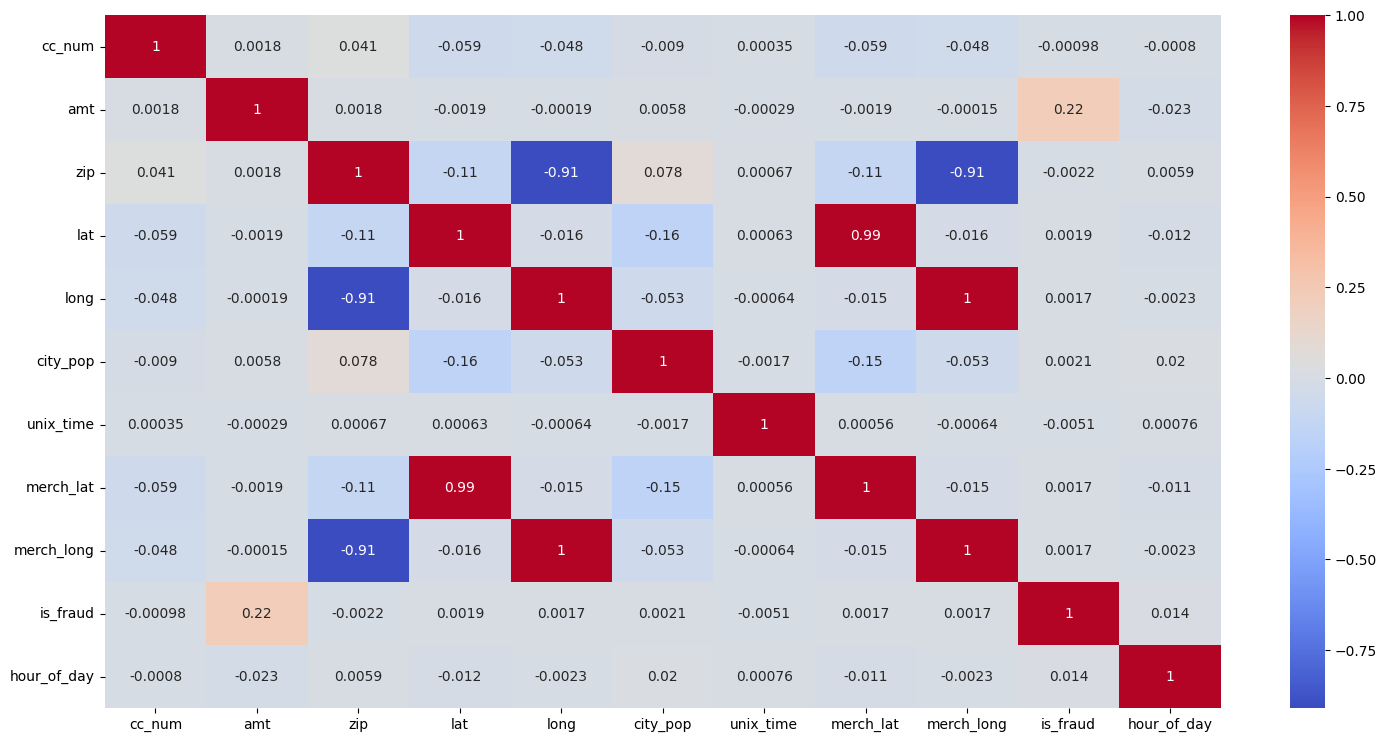

In [33]:
%matplotlib inline
fig = plt.figure(figsize=(18,9))
# mask = np.triu(np.ones_like(df_train.corr()))
# sns.heatmap(train_raw.corr(numeric_only=True), mask=mask, cmap='coolwarm', annot=True)
sns.heatmap(train_raw.corr(numeric_only=True),  cmap='coolwarm', annot=True)

# Feature Emgineering

## Feature Selection

In [34]:
features = ['trans_num', 'hour_of_day', 'category', 'amt', 'merchant', 'job']
target='is_fraud'

In [35]:
train_df = train_raw[features].set_index("trans_num")
train_target=train_raw[target]
test_df = test_raw[features].set_index("trans_num")
test_target=test_raw[target]

## one hot encoding

In [36]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder(dtype=np.int64)
encoder.fit(train_df[['category','merchant','job']])

train_df[['category','merchant','job']] = encoder.transform(train_df[['category','merchant','job']])

In [37]:
encoder = OrdinalEncoder(dtype=np.int64)
encoder.fit(test_df[['category','merchant','job']])

test_df[['category','merchant','job']] = encoder.transform(test_df[['category','merchant','job']])

In [38]:
train_df

,hour_of_day,category,amt,merchant,job
trans_num,,,,,
0b242abb623afc578575680df30655b9,0,8,4.97,514,370
1f76529f8574734946361c461b024d99,0,4,107.23,241,428
a1a22d70485983eac12b5b88dad1cf95,0,0,220.11,390,307
6b849c168bdad6f867558c3793159a81,0,2,45.00,360,328
a41d7549acf90789359a9aa5346dcb46,0,9,41.96,297,116
...,...,...,...,...,...
440b587732da4dc1a6395aba5fb41669,12,0,15.56,499,215
278000d2e0d2277d1de2f890067dcc0a,12,1,51.70,2,360
483f52fe67fabef353d552c1e662974c,12,1,105.93,599,308


# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logistic_model=LogisticRegression(random_state=42,solver="liblinear")

In [41]:
logistic_model.fit(train_df,train_target)

LogisticRegression(random_state=42, solver='liblinear')

In [42]:
logistic_model.score(train_df,train_target)

0.993658395511597

In [43]:
logistic_model.score(test_df,test_target)

0.9955067219224104

In [44]:
test_pred=logistic_model.predict(test_df)

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

<Axes: >

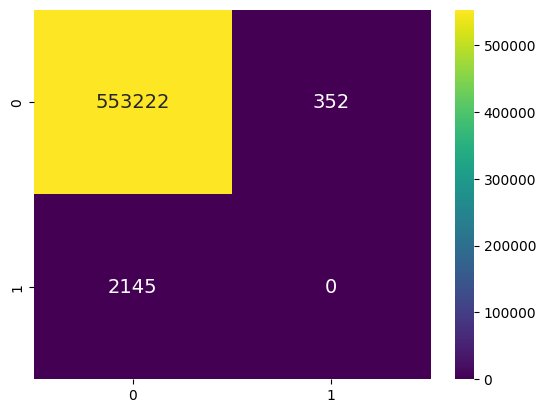

In [46]:
cfs_matrix=confusion_matrix(test_target,test_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))

In [47]:
cfs_matrix

array([[553222,    352],
       [  2145,      0]], dtype=int64)

In [48]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.00      0.00      0.00      2145

    accuracy                           1.00    555719
   macro avg       0.50      0.50      0.50    555719
weighted avg       0.99      1.00      0.99    555719



# random forest

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
random_model=RandomForestClassifier(random_state=42)

In [51]:
random_model.fit(train_df,train_target)

RandomForestClassifier(random_state=42)

In [52]:
random_model.score(train_df,train_target)

0.9999969151869204

In [53]:
random_model.score(test_df,test_target)

0.998159141580547

In [54]:
test_pred=random_model.predict(test_df)

In [55]:
print(classification_report(test_target, test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    553574
           1       0.81      0.68      0.74      2145

    accuracy                           1.00    555719
   macro avg       0.91      0.84      0.87    555719
weighted avg       1.00      1.00      1.00    555719



<Axes: >

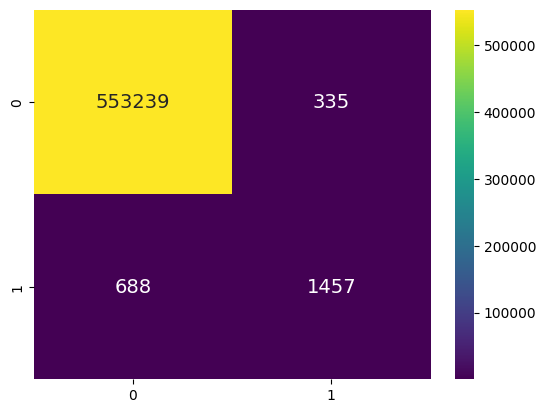

In [56]:
cfs_matrix=confusion_matrix(test_target,test_pred)
sns.heatmap(cfs_matrix, cmap='viridis', annot=True, fmt='d', annot_kws=dict(fontsize=14))